In [6]:
import numpy as np
import pulp
%matplotlib inline
import matplotlib.pyplot as plt

pandw = pulp.LpProblem("Pancakes and Waffles", pulp.LpMaximize)

p = pulp.LpVariable('p', lowBound=0, cat='Integer')
w = pulp.LpVariable('w', lowBound=0, cat='Integer')

In [7]:
# Objective Function
pandw += 6*p + 5*w, "S"

# Constraints
pandw += 3*p + 2*w <= 24
pandw += p + 2*w <= 18
pandw += 2*p + 2*w <= 20

In [9]:
print(pandw)

Pancakes and Waffles:
MAXIMIZE
6*p + 5*w + 0
SUBJECT TO
_C1: 3 p + 2 w <= 24

_C2: p + 2 w <= 18

_C3: 2 p + 2 w <= 20

VARIABLES
0 <= p Integer
0 <= w Integer



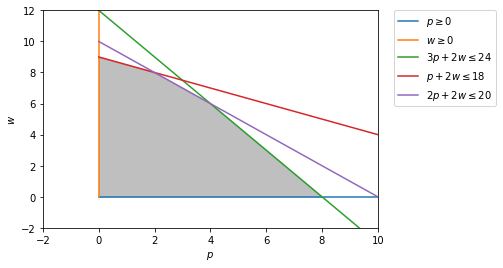

In [51]:
# Construct lines
# s >= 0
x = np.linspace(0, 15, 50)
p = x*0
# l >= 0
w = x*0
# 3*p + 2*w <= 24
y1 = (-3/2)*x + 24/2
# p + 2*w <= 18 
y2 = -1/2*x + 18/2
# 2*p + 2*w <= 20 
y3 = -2/2*x + 20/2

# Make plot
plt.plot(x, p, label=r'$p\geq0$')
plt.plot(w, x, label=r'$w\geq0$')
plt.plot(x, y1, label=r'$3p + 2w \leq 24$')
plt.plot(x, y2, label=r'$p + 2w \leq 18$')
plt.plot(x, y3, label=r'$2p + 2w \leq 20$')
plt.xlim((-2, 10))
plt.ylim((-2, 12))
plt.xlabel(r'$p$')
plt.ylabel(r'$w$')

# Fill feasible region
y4 = np.minimum(w, p)
y5 = np.minimum(y2,y3)
y6 = np.minimum(y5,y1)
plt.fill_between(x, w, y6, where=p<y1, color='grey', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [12]:
pandw.solve()
print(pulp.LpStatus[pandw.status])

Optimal


In [13]:
for var in pandw.variables():
    print(var.name + " = " + str(var.varValue))

p = 4.0
w = 6.0


In [14]:
print(pulp.value(pandw.objective))

54.0
